# Multiple Linear Regression Exploration

# Import libraries

In [236]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import print_function

from scipy import stats
from sklearn import linear_model


%matplotlib inline

pd.options.mode.chained_assignment = None # default = 'warn'
pd.set_option('display.max_columns', 500)
color = sns.color_palette()

# Pull data and create regression object

In [237]:
train = pd.read_csv('train.csv', parse_dates=['timestamp'])
test = pd.read_csv('test.csv', parse_dates = ['timestamp'])
macro = pd.read_csv('macro.csv', parse_dates = ['timestamp'])

ols = linear_model.LinearRegression()  # create the object easily

# Combine Datasets

In [238]:
train['dataset'] = 'train'
test['dataset'] = 'test'

# concat train and test
df = pd.concat([train, test])

# merge macro set 
df = pd.merge(df, macro, how='left', on = 'timestamp')

df.shape

(38133, 392)

# Subset important columns

In [239]:
df_important = df.loc[:, ['id', 'timestamp', 'full_sq',
                          'life_sq', 'floor', 'max_floor', 'material',
                          'build_year', 'num_room',
                          'kitch_sq', 'state',
                          'product_type', 'sub_area',
                          'indust_part', 'school_education_centers_raion',
                          'sport_objects_raion', 'culture_objects_top_25_raion',
                          'oil_chemistry_raion', 'metro_min_avto',
                          'green_zone_km', 'industrial_km',
                          'kremlin_km', 'radiation_km',
                          'ts_km', 'fitness_km',
                          'stadium_km', 'additional_education_km',
                          'cafe_count_1500_price_500', 'cafe_count_1500_price_high',
                          'cafe_count_2000_price_2500', 'trc_sqm_5000',
                          'cafe_count_5000', 'cafe_count_5000_price_high',
                          'gdp_quart', 'cpi',
                          'ppi', 'usdrub',
                          'eurrub', 'gdp_annual',
                          'rts', 'micex',
                          'micex_cbi_tr', 'deposits_rate',
                          'mortgage_rate', 'income_per_cap',
                          'salary', 'labor_force',
                          'unemployment', 'employment', 'price_doc']]

# Check Missing Data

In [240]:
# check missing values
# df_important.info()
# it checked out

# missing data
df_na = (df_important.isnull().sum() / len(df_important)) * 100     # total missing/total observations as percent
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)     # 

[<matplotlib.text.Text at 0x1b2e6400>, <matplotlib.text.Text at 0x1b2c5cf8>]

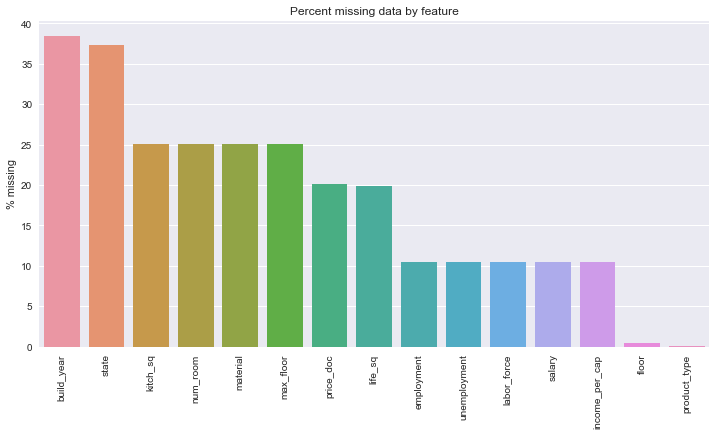

In [241]:
f, ax = plt.subplots(figsize = (12,6))  # max length 12, height of 6    # only use f to get ax
plt.xticks(rotation = '90')             # rotate labels
sns.barplot(x=df_na.index, y = df_na)   # plot colname with percent missing
ax.set(title='Percent missing data by feature', ylabel = '% missing')   # ax, wheres f

# Processing

In [242]:
# df_important.dtypes

In [243]:
# change oil_chemistry_raion to 1 or 0 
df_important['oil_chem_raion'] = df_important['oil_chemistry_raion'].map(dict(yes=1, no=0))

df_important['oil_chemistry_raion'] = df_important['oil_chem_raion']
df_important.drop('oil_chem_raion', axis = 1, inplace=True)

df_important.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,gdp_quart,cpi,ppi,usdrub,eurrub,gdp_annual,rts,micex,micex_cbi_tr,deposits_rate,mortgage_rate,income_per_cap,salary,labor_force,unemployment,employment,price_doc
0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,0.000070,5,7,0,0,2.590241,0.600973,1.080934,15.156211,1.210027,4.308127,0.485841,8.148591,0.947962,14,0,2,4036616,152,0,14313.7,354.0,420.7,29.0048,41.7681,46308.5,1575.33,1438.74,204.78,4.1,11.84,42688.6,44898.7,6643.626,0.014,0.708,5850000.0
1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,0.049637,8,6,1,0,0.936700,0.065321,0.966479,8.698054,2.724295,0.725560,0.668364,6.127073,1.072315,6,0,2,2034942,177,0,14313.7,354.0,420.7,28.9525,41.7537,46308.5,1578.91,1444.11,204.92,4.1,11.84,42688.6,44898.7,6643.626,0.014,0.708,6000000.0
2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,0.118537,7,5,0,0,2.120999,0.453172,0.939275,9.067885,0.772216,3.562188,0.733101,0.767569,0.391957,4,0,1,1572990,122,0,14313.7,354.0,420.7,28.8082,41.7114,46308.5,1596.17,1458.84,204.84,4.1,11.84,42688.6,44898.7,6643.626,0.014,0.708,5700000.0
3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,0.069753,10,17,0,0,1.489049,0.106125,0.451173,19.487005,6.348716,0.583025,0.623484,7.385521,0.892674,5,0,1,942180,61,1,14313.7,353.2,434.4,28.9655,41.4014,46308.5,1703.86,1551.58,205.42,4.0,11.92,40311.3,44898.7,6643.626,0.014,0.708,13100000.0
4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,0.037316,9,25,0,0,1.257186,0.236214,0.392871,2.578671,1.638318,2.609420,0.220288,3.610754,0.810801,70,1,50,3503058,2283,17,14313.7,353.2,434.4,29.4625,41.5902,46308.5,1617.01,1492.83,198.24,4.0,11.92,40311.3,44898.7,6643.626,0.014,0.708,16331452.0


In [244]:
df_important.dtypes

id                                         int64
timestamp                         datetime64[ns]
full_sq                                  float64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
indust_part                              float64
school_education_centers_raion             int64
sport_objects_raion                        int64
culture_objects_top_25_raion               int64
oil_chemistry_raion                        int64
metro_min_avto                           float64
green_zone_km                            float64
industrial_km       

## Note: all columns are integers or floats, except for the sub_area and the product_type
#### these are the raions and the investment/owner property

## Normalize Price

And set up x and y

In [245]:
df_important['price_doc_log'] = np.log1p(df_important['price_doc'])
df_important['price_doc_log10'] = np.log10(df_important['price_doc'])
# df_important_nona = df_important.dropna()

In [246]:
x = train_nona.drop('price_doc', axis = 1)
x = x.drop('price_doc_log', axis = 1)
x = x.drop('price_doc_log10', axis = 1)
x = x.select_dtypes(include=['float64'])


In [247]:
y = train_nona[['price_doc_log']]

## Fit the Regression

In [248]:
ols.fit(x, y)
# print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x,y)))    # only 31% (so bad)

R^2 is 0.31320360088


## Create:
+ Green
+ Prom
+ Office
+ Trc
+ Chruch
+ Sport
+ Leisure
+ Market
+ Cafe_price
+ Cafe_count

In [249]:
green = ['green_part_500', 'green_part_1000','green_part_1500',
         'green_part_2000','green_part_3000','green_part_5000']

prom = ['prom_part_500','prom_part_1000','prom_part_1500',
        'prom_part_2000','prom_part_3000','prom_part_5000']
        
office = ['office_count_500','office_sqm_500','office_count_1000',
          'office_sqm_1000','office_count_1500', 'office_sqm_1500',
          'office_count_2000','office_sqm_2000','office_count_3000',
          'office_sqm_3000','office_count_5000','office_sqm_5000']
          
# shopping malls
trc = ['trc_count_1000', 'trc_count_1500', 'trc_count_2000', 'trc_count_3000', 
       'trc_count_500', 'trc_count_5000', 'trc_sqm_1000', 'trc_sqm_1500',
       'trc_sqm_2000', 'trc_sqm_3000', 'trc_sqm_500', 'trc_sqm_5000', 'trc_count_1000', 'trc_sqm_1000']
       
       
church = ['big_church_count_500', 'church_count_500', 'mosque_count_500',
         'big_church_count_1000', 'church_count_1000', 'mosque_count_1000',
         'big_church_count_1500', 'church_count_1500', 'mosque_count_1500',
         'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
         'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
         'big_church_count_2000', 'church_count_2000', 'mosque_count_2000']

        
sport = ['sport_count_500','sport_count_1000','sport_count_2000', 
         'sport_count_5000','sport_count_1500','sport_count_3000']

leisure = ['leisure_count_500','leisure_count_3000','leisure_count_1000',
           'leisure_count_1500','leisure_count_2000','leisure_count_5000']

market = ['market_count_500','market_count_5000', 'market_count_2000',
          'market_count_1000','market_count_1500','market_count_3000']    


cafe_price = ['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
              'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg','cafe_sum_1000_max_price_avg', 
              'cafe_avg_price_1000', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 
              'cafe_avg_price_1500', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 
              'cafe_avg_price_2000', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg',
              'cafe_avg_price_3000',  'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',
              'cafe_avg_price_5000','cafe_count_5000_price_high']      

    
cafe_count = ['cafe_count_500', 'cafe_count_500_na_price',
       'cafe_count_500_price_500', 'cafe_count_500_price_1000',
       'cafe_count_500_price_1500', 'cafe_count_500_price_2500',
       'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'cafe_count_1000', 
       'cafe_count_1000_na_price', 'cafe_count_1000_price_500',
       'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500',
       'cafe_count_1000_price_2500', 'cafe_count_1000_price_4000',
       'cafe_count_1000_price_high','cafe_count_1500',
       'cafe_count_1500_na_price',
       'cafe_count_1500_price_500', 'cafe_count_1500_price_1000',
       'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500',
       'cafe_count_1500_price_4000', 'cafe_count_1500_price_high', 'cafe_count_2000', 
       'cafe_count_2000_na_price', 'cafe_count_2000_price_500',
       'cafe_count_2000_price_1000', 'cafe_count_2000_price_1500',
       'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000',
       'cafe_count_2000_price_high', 'cafe_count_3000', 'cafe_count_3000_na_price',
       'cafe_count_3000_price_500', 'cafe_count_3000_price_1000',
       'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500',
       'cafe_count_3000_price_4000', 'cafe_count_3000_price_high','cafe_count_5000',
       'cafe_count_5000_na_price', 'cafe_count_5000_price_500',
       'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500',
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high'] 
        
price = ['price_doc', 'price_doc_log', 'price_doc_log10'] 

#### Green, Prom, Office, Trc, Chruch, Sport, Leisure, Market, Cafe_price,  Cafe_count

In [250]:
x_cafe = train[cafe_count]
x_cafe = x_cafe.dropna()
y = train[['price_doc_log']]

ols.fit(x_cafe, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_cafe,y)))   # 0.08 before but now 1.0

Coeffs are [[  2.02856761e+09  -2.02856761e+09  -2.02856761e+09  -2.02856761e+09
   -2.02856761e+09  -2.02856761e+09  -2.02856761e+09  -2.02856761e+09
    2.54034996e-04   1.98282301e-02  -9.79506969e-03   3.58009338e-03
    7.19499588e-03   9.77575779e-04  -3.90267372e-02   1.75704360e-02
    5.43427467e-03  -3.03390622e-03   1.81531906e-03  -6.75511360e-03
   -8.30593705e-03   9.32234526e-03  -2.96115875e-02   4.20833007e-02
   -4.49216366e-03  -2.69681215e-03   4.77218628e-03   1.10850334e-02
   -8.67843628e-04  -7.24691153e-03   2.33708620e-02  -3.29381302e-02
    1.89957023e-03   9.49290395e-03  -8.37936997e-03  -2.34782696e-04
    1.93119049e-05   2.13789940e-03  -1.17961168e-02   1.11229569e-02
    5.28049469e-03   1.23032928e-03  -1.25064254e-02   2.40170956e-03
   -7.18307495e-03  -3.08614969e-03  -1.75397694e-02   4.24386859e-02]]
R^2 is 0.0892018322759


In [251]:
x_church = train[church]
x_church = x_church.dropna()
y = train[['price_doc_log']]

ols.fit(x_church, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_church,y)))  # 0.05

Coeffs are [[ 0.022364   -0.05036055 -0.14571221  0.03528865 -0.01173266  0.15301492
   0.00110367  0.00212856  0.04093205  0.00027564 -0.00134871 -0.02354261
  -0.00368676  0.00646323  0.05961167 -0.01251535  0.00133001  0.04313117]]
R^2 is 0.0559264588909


In [252]:
x_green = train[church]
x_green = x_green.dropna()
y = train[['price_doc_log']]

ols.fit(x_green, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_green,y)))  # 0.05

Coeffs are [[ 0.022364   -0.05036055 -0.14571221  0.03528865 -0.01173266  0.15301492
   0.00110367  0.00212856  0.04093205  0.00027564 -0.00134871 -0.02354261
  -0.00368676  0.00646323  0.05961167 -0.01251535  0.00133001  0.04313117]]
R^2 is 0.0559264588909


In [253]:
x_cafe_price = train[cafe_price]
x_cafe_price = x_cafe_price.dropna()
y = train[['price_doc_log']]

ols.fit(x_cafe_price, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_cafe_price,y)))

ValueError: Found input variables with inconsistent numbers of samples: [17190, 30471]

In [ ]:
x_office = train[office]
x_office = x_office.dropna()
y = train[['price_doc_log']]

ols.fit(x_office, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_office,y))) # 0.06

In [ ]:
x_sport = train[church]
x_sport = x_sport.dropna()
y = train[['price_doc_log']]

ols.fit(x_sport, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_sport,y))) # 0.05

In [ ]:
x_leisure = train[church]
x_leisure = x_leisure.dropna()
y = train[['price_doc_log']]

ols.fit(x_leisure, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_leisure,y)))   # 0.05

In [ ]:
x_market = train[church]
x_market = x_market.dropna()
y = train[['price_doc_log']]

ols.fit(x_market, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_market,y))) # 0.05

# More

In [ ]:
important_features = ['id', 'full_sq', 'life_sq', 'floor',
                      'max_floor', 'material', 'build_year',
                      'num_room', 'kitch_sq', 'state', 'area_m',
                      'price_doc', 'gdp_quart', 'deposits_value', 
                      'deposits_growth', 'deposits_rate', 'mortgage_value',
                      'mortgage_growth', 'mortgage_rate', 'salary',
                      'unemployment', 'employment',  'oil_urals',
                      'stadium_km', 'floor', 'max_floor', 'metro_min_avto',
                      'build_year', 'cafe_count_5000_price_high', 'num_room',
                      'radiation_km',
                      'green_zone_km', 'industrial_km', 'indust_part',
                      'cpi', 'cafe_count_5000', 'cafe_count_1500_price_high',
                      'cafe_count_5000_price_500', 'cafe_count_2000_price_2500',
                      'kitch_sq', 'max_floor', 'trc_sqm_5000', 
                      'office_sqm_1000', 'trc_sqm_1500', 'office_sqm_500', 'cpi', 
                      'office_sqm_5000', 'ID_railroad_terminal', 'office_sqm_1500', 
                      'ekder_male', 'raion_popul', 'price_doc']

important_features = list(set(important_features))
# 'month', 'day',
#                       'year', 'month_year', 'week_year', 'oil_chemistry_raion_yes',

In [ ]:
result = pd.concat(, axis=1, join_axes=[df1.index])

x_imp = result[important_features]
x_imp = x_imp.dropna()
y = result[['price_doc_log']]

ols.fit(x_imp, y)

print('Coeffs are ' + str(ols.coef_))
print('R^2 is ' + str(ols.score(x_imp,y))) # 0.05

possible features to engineer/keep:

gdp

loans

employment

cpi



building age

market sentiment/months behind/economy delay

less than five km park yes/no

crime?

traffic?

distances within raion

area squared

other variables squared